# Exploring high dimensional data

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 1 exercises "Dimensionality Reduction in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Introduction

## Finding the number of dimensions in a dataset


<div class=""><p>A larger sample of the Pokemon dataset has been loaded for you as the Pandas dataframe <code>pokemon_df</code>.</p>
<p>How many dimensions, or columns are in this dataset?</p></div>

In [ ]:
pokemon_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/07-dimensionality-reduction-in-python/datasets/pokemon_df_160_7.csv')

In [ ]:
pokemon_df.shape

(160, 7)

**Answer: 7 dimensions***

That's correct, each Pokemon is described by 7 features.

## Removing features without variance

<p>A sample of the Pokemon dataset has been loaded as <code>pokemon_df</code>. To get an idea of which features have little variance you should use the IPython Shell to calculate summary statistics on this sample. Then adjust the code to create a smaller, easier to understand, dataset.</p>

Instructions 1/3
<li>Use the <code>.describe()</code> method to find the numeric feature without variance and remove its name from the list assigned to <code>number_cols</code>.</li>

In [ ]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense', 'Generation']

pokemon_df[number_cols].describe()
number_cols.remove('Generation')

Instructions 2/3
<li>Combine the two lists of feature names to sub-select the chosen features from <code>pokemon_df</code>.</li>

In [ ]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense']

# Leave this list as is for now
non_number_cols = ['Name', 'Type', 'Legendary']

# Sub-select by combining the lists with chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

Instructions 3/3
<li>Find the non-numeric feature without variance and remove its name from the list assigned to <code>non_number_cols</code>.</li>

In [ ]:
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type', 'Legendary']

In [ ]:
pokemon_df.describe(exclude='number')

,Name,Type,Legendary
count,160,160,160
unique,160,15,1
top,Sandslash,Water,False
freq,1,31,160


In [ ]:
non_number_cols.remove('Legendary')

In [ ]:
# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name   Type
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


Correct! All Pokemon in this dataset are non-legendary and from generation one so you could choose to drop those two features.

## Feature selection vs feature extraction

### Visually detecting redundant features

<div class=""><p>Data visualization is a crucial step in any data exploration.
Let's use Seaborn to explore some samples of the US Army ANSUR body measurement dataset.</p>
<p>Two data samples have been pre-loaded as <code>ansur_df_1</code> and  <code>ansur_df_2</code>.</p>
<p>Seaborn has been imported as <code>sns</code>.</p></div>

Instructions 1/4
<li>Create a pairplot of the <code>ansur_df_1</code> data sample and color the points using the <code>'Gender'</code> feature.</li>

In [ ]:
import seaborn as sns

In [ ]:
ansur_df_1 = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/07-dimensionality-reduction-in-python/datasets/ansur_df_1.csv')

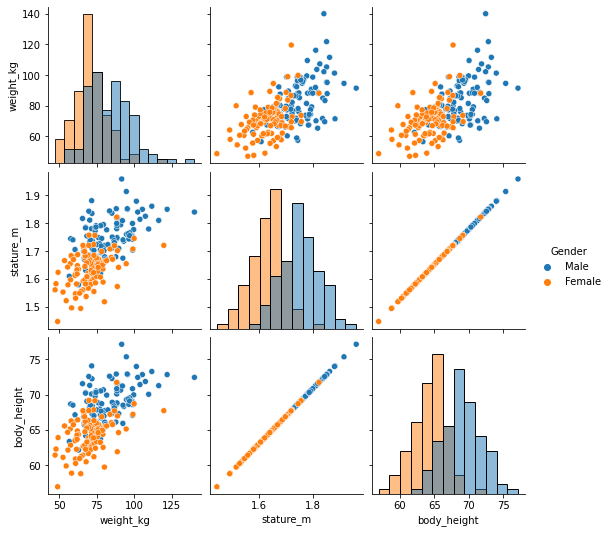

In [ ]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

Instructions 2/4
<li>Two features are basically duplicates, remove one of them from the dataset.</li>

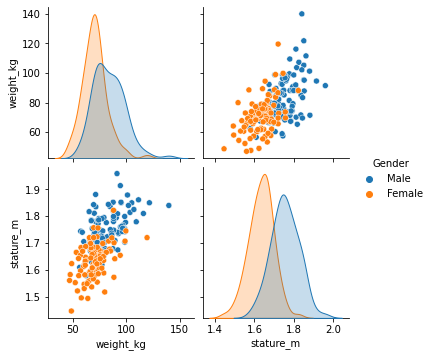

In [ ]:
# Remove one of the redundant features
reduced_df = ansur_df_1.drop('body_height', 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()

Instructions 3/4
<li>Now create a pairplot of the <code>ansur_df_2</code> data sample and color the points using the <code>'Gender'</code> feature.</li>

In [ ]:
ansur_df_2 = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/07-dimensionality-reduction-in-python/datasets/ansur_df_2.csv')

In [ ]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

Instructions 4/4
<li>One feature has no variance, remove it from the dataset.</li>

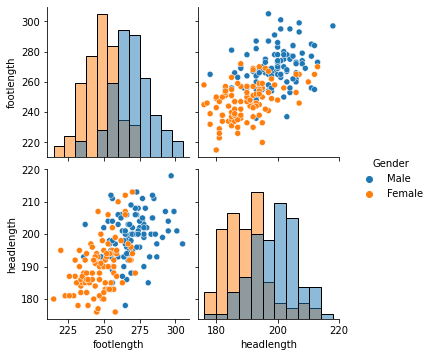

In [ ]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop('n_legs', 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

Correct, the body height (inches) and stature (meters) hold the same information in a different unit + all the individuals in the second sample have two legs.

<div class="dc-u-p-24"><h1 class="dc-u-fs-h3">Advantage of feature selection</h1><div class=""><p>What advantage does feature selection have over feature extraction?</p></div></div>
Answer
<div class="">The selected features remain unchanged, and are therefore easy to interpret.</div>

**Correct! Extracted features can be quite hard to interpret.**

## t-SNE visualization of high-dimensional data


<div class="dc-u-p-24"><h1 class="dc-u-fs-h3">t-SNE intuition</h1><div class=""><p>t-SNE is super powerful, but do you know exactly when to use it?</p>
<hr>
<p>What is a good use case to use t-SNE?</p></div></div>

Answer
<div class="">When you want to visually explore the patterns in a high dimensional dataset.</div>

**Correct! That is exactly what t-SNE is great at.**

### Fitting t-SNE to the ANSUR data


<p>t-SNE is a great technique for visual exploration of high dimensional datasets. In this exercise, you'll apply it to the ANSUR dataset. You'll remove non-numeric columns from the pre-loaded dataset <code>df</code> and fit <code>TSNE</code> to his numeric dataset.</p>

<ul>
<li>Drop the non-numeric columns from the dataset.</li>
<li>Create a <code>TSNE</code> model with learning rate 50.</li>
<li>Fit and transform the model on the numeric dataset.</li>
</ul>

In [ ]:
from sklearn.manifold import TSNE
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/07-dimensionality-reduction-in-python/datasets/ansur_df.csv')

In [ ]:
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate = 50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(6068, 2)


Good job! t-SNE reduced the more than 90 features in the dataset to just 2 which you can now plot.

### t-SNE visualisation of dimensionality

<p>Time to look at the results of your hard work. In this exercise, you will visualize the output of t-SNE dimensionality reduction on the combined male and female Ansur dataset.
You'll create 3 scatterplots of the 2 t-SNE features (<code>'x'</code> and <code>'y'</code>) which were added to the dataset <code>df</code>. In each scatterplot you'll color the points according to a different categorical variable.</p>

Instructions 1/3
<ul>
<li>Use seaborn's <code>sns.scatterplot</code> to create the plot.</li>
<li>Color the points by <code>'Component'</code>.</li>
</ul>

In [ ]:
df['x'] = tsne_features[:, 0]
df['y'] = tsne_features[:, 1]

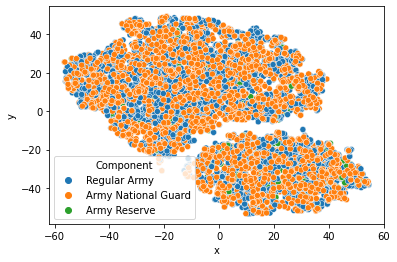

In [ ]:
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

# Show the plot
plt.show()

Instructions 2/3
<li>Color the points of the scatterplot by <code>'Branch'</code>.</li>

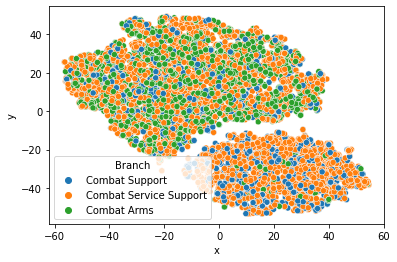

In [ ]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()

Instructions 3/3
<li>Color the points of the scatterplot by <code>'Gender'</code>.</li>

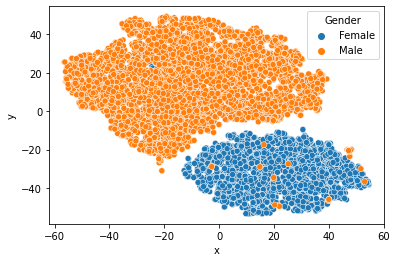

In [ ]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()

Eureka! There is a Male and a Female cluster. t-SNE found these gender differences in body shape without being told about them explicitly! From the second plot you learned there are more males in the Combat Arms Branch.